(nm_heun_method)=
# Heun's method
```{index} Heun's method
```
{ref}`Euler's method <nm_euler_method>` is first-order accurate because it calculates the derivative using only the information available at the beginning of the time step. Higher-order convergence can be obtained if we also employ information from other points in the interval - the more points that we employ, the more accurate method for solving ODEs can be. [Heun's method](https://en.wikipedia.org/wiki/Heun%27s_method) uses 2 points compared to Euler's one single point, increasing accuracy. 

Heun's method may be derived by attempting to use derivative information at both the start and the end of the interval:

\\[u(t+\Delta t)\approx u(t)+\frac{\Delta t}{2}\left(u'(t)+u'(t+\Delta t)\right),\\\\\\
  u(t+\Delta t)\approx u(t)+\frac{\Delta t}{2}\big(f(u(t),t)+f(u(t+\Delta t),t+\Delta t)\big).\\]

The difficulty with this approach is that we now require \\(u(t+\Delta t)\\) in order to calculate the final term in the equation, and that's what we set out to calculate so we don't know it yet! So at this point we have an example of an implicit algorithm and at this stage the above ODE solver would be referred to as the trapezoidal method if we could solve it exactly for \\(u(t+\Delta t)\\).

Heun's method, unlike Euler method, is an implicit method, meaning that we do not have all of the information needed. While we have the information about \\(u(t)\\) and \\(f(u(t),t)\\), we lack information about \\(u(t+\Delta t)\\) and \\(f(u(t+\Delta t),t)\\), and we have to deal with not knowing these things somehow. 

The simplest solution to this dilemma, the one adopted in Heun's method, is to use a first guess at \\(x(t+\Delta t)\\) calculated using Euler's method:

\\[ \tilde{u}(t+\Delta t)=u(t)+\Delta tf(u(t),t). \\]

This first guess is then used to solve for \\(u(t+\Delta t)\\) using:

\\[ u(t+\Delta t)\approx u(t)+\frac{\Delta t}{2}\big(f(u(t),t)+f(\tilde{u}(t+\Delta t),t+\Delta t)\big).\\]

The generic term for schemes of this type is **predictor-corrector**. The initial calculation of \\(\tilde{u}(t+\Delta t)\\) is used to predict the new value of \\(u\\) and then this is used in a more accurate calculation to produce a more correct value. 

Note that Heun's method is \\(O(\Delta t^2)\\), i.e. **2nd order accurate**.

## Implementation

We will write a function `heun(f,u0,t0,t_max,dt)` that takes as arguments the function \\(f(u,t)\\) on the RHS of our ODE,
an initial value for \\(u\\), the start and end time of the integration, and the time step.

We will use it to integrate the following ODEs up to time \\(t=10\\)

\\[u'(t)=u(t),\quad u(0)=1,\\]

plot the results and compare them to Euler method.

First let's define the functions:

In [9]:
import matplotlib.pyplot as plt
import numpy as np

def euler(f,u0,t0,t_max,dt):
    u=u0; t=t0; u_all=[u0]; t_all=[t0];
    while t<t_max:
        u = u + dt*f(u,t)
        u_all.append(u)
        t = t + dt
        t_all.append(t)
    return(u_all,t_all)

def heun(f,u0,t0,t_max,dt):
    u=u0; t=t0; u_all=[u0]; t_all=[t0];
    while t<t_max:
        ue = u + dt*f(u,t) # euler guess
        u = u + 0.5*dt*(f(u,t) + f(ue,t+dt))
        u_all.append(u)
        t = t + dt
        t_all.append(t)
    return(u_all,t_all)

def f1(u,t):
    val = u
    return val

def f2(u,t):
    val = np.cos(u)
    return val

Plot the solution for the first function:

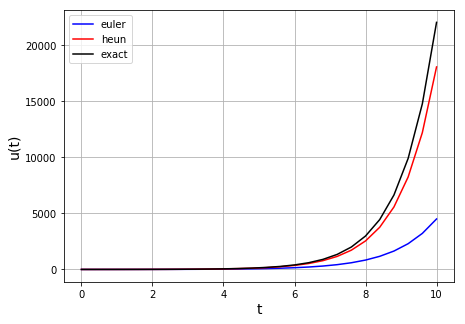

In [11]:
dt = 0.4
u0 = 1.0
t0 = 0.0
tf = 10.0

# set up figure
fig = plt.figure(figsize=(7, 5))
ax1 = plt.subplot(111)

(u_all,t_all) = euler(f1,u0,t0,tf,dt)
ax1.plot(t_all, u_all,'b',label='euler')

(u_all,t_all) = heun(f1,u0,t0,tf,dt)
ax1.plot(t_all, u_all,'r',label='heun')

# exact solution
ax1.plot(t_all, np.exp(t_all),'k',label='exact')

ax1.set_xlabel('t', fontsize=14)
ax1.set_ylabel('u(t)', fontsize=14)
ax1.grid(True)
ax1.legend(loc='best')

plt.show()